In [20]:
import math
from graphviz import Digraph
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [21]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

In [22]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d*f; L.label = 'L'
L

Value(data=-8.0)

In [23]:
from graphviz import Digraph

def trace(root):
    # Build a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # For any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid, label="{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape="record")
        if n._op:
            # If this value is a result of some operation, create an op node for it
            dot.node(name=uid + n._op, label=n._op)
            # Connect this op node to the value node
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # Connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot


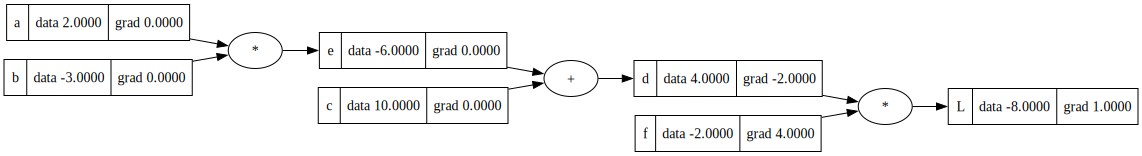

In [29]:
draw_dot(L)


In [25]:
L.grad = 1.0

In [28]:
d.grad = -2.0
f.grad = 4.0


In [34]:
def lol():

    h = 0.0001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f =Value(-2.0 + h, label='f')
    L = d*f; L.label = 'L'
    L1 = L.data
    print(L1)

    a = Value(2.0 + h, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    # d.data += h
    f =Value(-2.0 + h, label='f')
    L = d*f; L.label = 'L'
    L2 = L.data
    print(L2)

    print((L2 - L1)/h)

lol()


-7.9996
-7.999000029999998
5.999700000023367
